In [1]:
import csv
import cv2
import numpy as np

lines = []

with open('../data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []

for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = '../data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

X_train = np.array(images)
y_train = np.array(measurements)

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(Lambda(lambda x: (x/255.0) - 0.5, input_shape=(160,320,3)))
model.add(Conv2D(6, (5, 5), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))
model.compile(loss='mse', optimizer = 'adam')# a FC network
from keras.models import Sequential
from keras.layers import Flatten, Dense
model.fit(X_train,y_train, validation_split=0.2, shuffle=True, initial_epoch=0, epochs=5)

model.save('Lenet5.h5')
print(model.summary())

Train on 6428 samples, validate on 1608 samples
Epoch 1/5
6428/6428 [==============================] - 258s - loss: 16.4324 - val_loss: 0.0230
Epoch 2/5
6428/6428 [==============================] - 257s - loss: 0.0148 - val_loss: 0.0145
Epoch 3/5
6428/6428 [==============================] - 256s - loss: 0.0110 - val_loss: 0.0123
Epoch 4/5
6428/6428 [==============================] - 255s - loss: 0.0100 - val_loss: 0.0125
Epoch 5/5
6428/6428 [==============================] - 254s - loss: 0.0094 - val_loss: 0.0125
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 316, 6)       456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 6)        0         
___________________

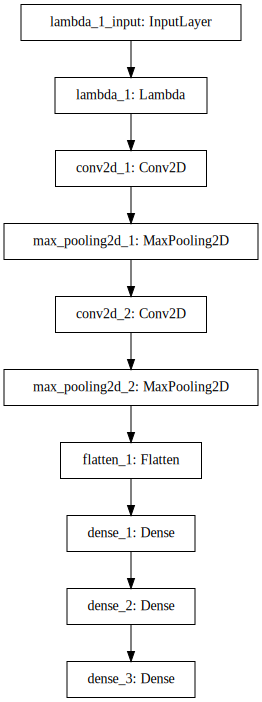

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))